In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings


warnings.filterwarnings('ignore')

#load data
df=pd.read_csv("insurance.csv")
df=df.dropna()

#general information
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Data distribution analysys


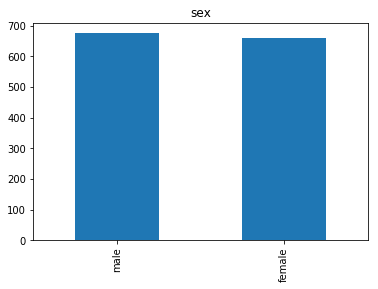

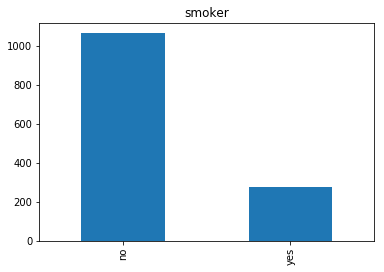

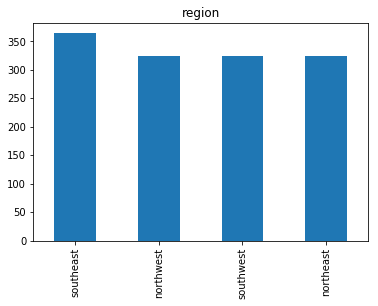

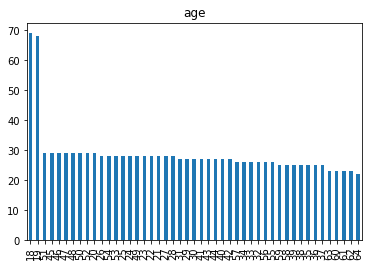

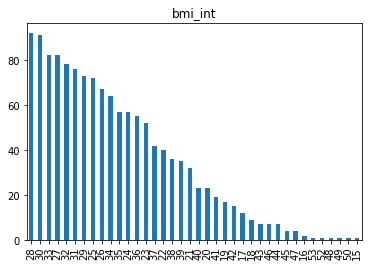

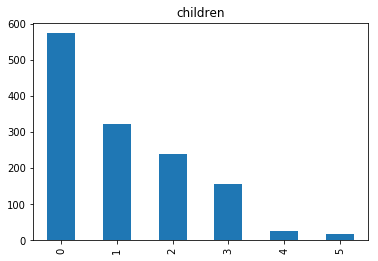

In [3]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


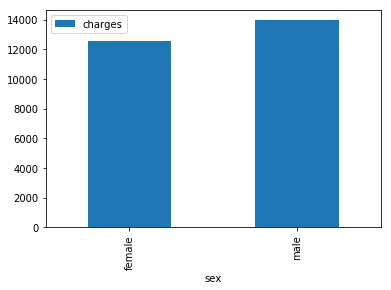

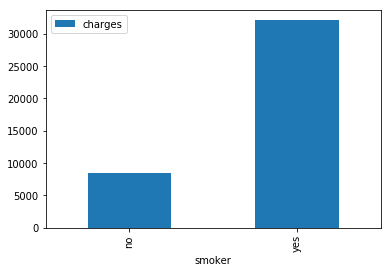

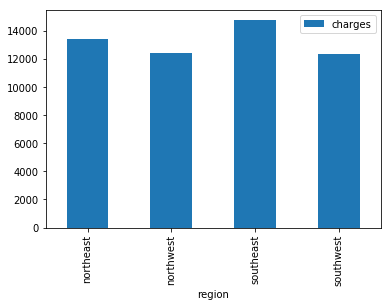

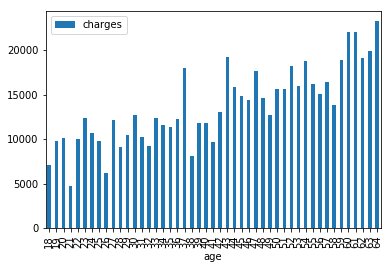

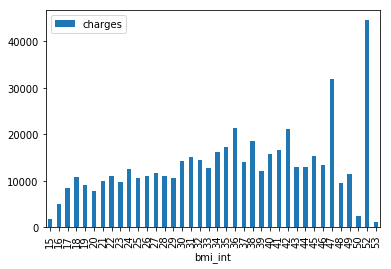

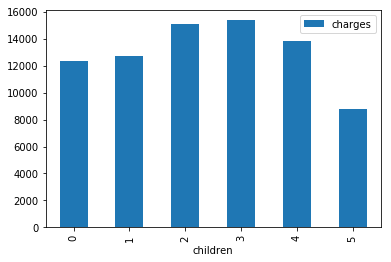

In [4]:
#average cost analysys
print('Mean cost analysys:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

Variables pairplot:


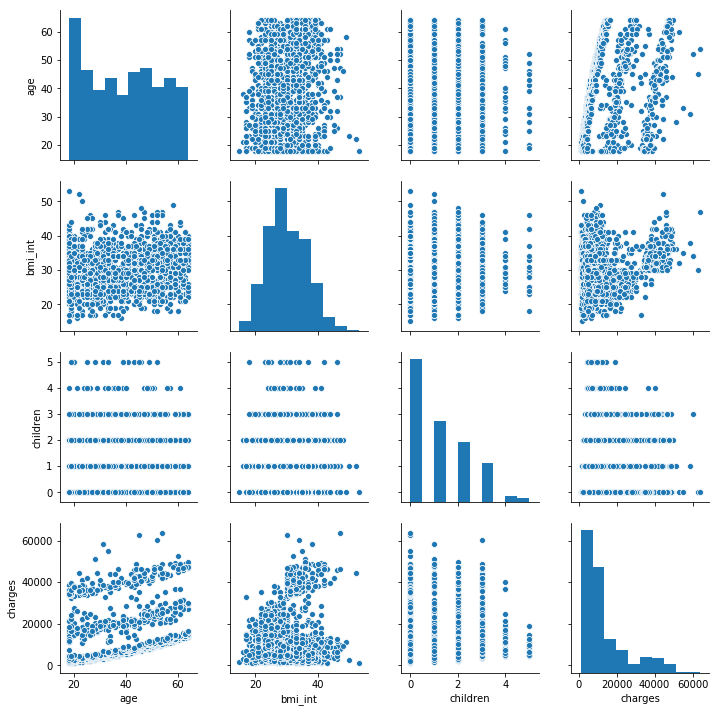

In [5]:
#variables pairplot
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [6]:
print('Model training and evaluating\n\n')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))


Model training and evaluating


ExtraTreesRegressor evaluating result:
Train MAE:  17.889135373862327
Train RMSE:  413.77689999135333
Test MAE:  2954.0800373285433
Test RMSE:  5620.879039971862


Feature importance ranking


1.smoker(0.607388)
2.bmi(0.187839)
3.age(0.145421)
4.children(0.026008)
5.region(0.022089)
6.sex(0.011255)


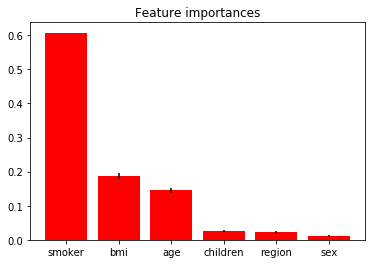

In [7]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

In [8]:
print('Predicting on new data\n\n')

billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

billy[0] = le_sex.transform([billy[0]])[0] 
billy[1] = le_smoker.transform([billy[1]])[0] 
billy[2] = le_region.transform([billy[2]])[0] 

X = sc.transform([billy])

cost_for_billy = regressor.predict(X)[0]
print('Cost for Billy = ',cost_for_billy,'\n\n')


dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.transform([dennis[0]])[0] 
dennis[1] = le_smoker.transform([dennis[1]])[0] 
dennis[2] = le_region.transform([dennis[2]])[0] 

X = sc.transform([dennis])

cost_for_dennis = regressor.predict(X)[0]

print('Cost for Dennis = ',cost_for_dennis)

Predicting on new data


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Billy =  32252.82736099997 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Dennis =  14882.663862700001
